# Library Importing

In [1]:
import numpy as np #untuk perhitungan matrix
import pandas as pd #untuk dataframe
import matplotlib.pyplot as plt #untuk ploting
import seaborn as sns #untuk ploting
from tqdm.auto import tqdm #untuk progress bar

# Data Preparation

## data importing

In [2]:
#import dataset train
df_train = pd.read_csv("salju_train.csv")

#jadikan "Tanggal" sebagai index
df_train.index = df_train.Tanggal

#parse index
df_train.index = pd.to_datetime(df_train.index)

#tampilkan 5 data teratas
df_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
Tanggal,,,,,,,,,,,,,,,,,,,,,
2014-01-06,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
2014-07-15,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2011-02-16,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
2012-08-08,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
2016-10-29,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [3]:
#import dataset test
df_test = pd.read_csv("salju_test.csv")

#jadikan "Tanggal" sebagai index
df_test.index = df_test.Tanggal

#parse index
df_test.index = pd.to_datetime(df_test.index)

#tampilkan 5 data teratas
df_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
Tanggal,,,,,,,,,,,,,,,,,,,,,
2010-04-11,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
2015-03-26,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2016-03-22,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
2011-09-12,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
2017-05-20,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [4]:
#gabungkan dataset train dan test
df = pd.concat([df_train, df_test])

#urutkan berdasarkan index
df = df.sort_index()

#tampilkan 20 data terbawah
df.tail(20)

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
Tanggal,,,,,,,,,,,,,,,,,,,,,
2017-12-06,32869.0,12/06/2017,C3,13.9,22.4,14.6,0.8,7.4,SW,24.0,...,83.0,63.0,1021.0,1017.1,4.0,5.0,17.8,22.0,Ya,Ya
2017-12-06,46943.0,12/06/2017,C2,11.3,20.4,1.2,0.8,7.5,SSE,26.0,...,92.0,59.0,1025.0,1024.0,2.0,3.0,11.6,19.1,Ya,Tidak
2017-12-06,82276.0,12/06/2017,C26,9.2,18.9,0.4,NaN,NaN,SSW,17.0,...,99.0,69.0,1025.4,1023.7,8.0,NaN,9.6,18.5,Tidak,Tidak
2017-12-06,46591.0,12/06/2017,C17,6.5,15.5,0.0,NaN,NaN,NNW,24.0,...,96.0,70.0,NaN,NaN,8.0,NaN,8.2,14.4,Tidak,Tidak
2017-12-06,73880.0,12/06/2017,C42,6.6,18.7,0.0,NaN,NaN,S,35.0,...,87.0,47.0,1027.1,1025.5,NaN,NaN,10.5,18.0,Tidak,Tidak
2017-12-06,61797.0,12/06/2017,C10,NaN,23.9,0.0,NaN,NaN,NaN,NaN,...,80.0,NaN,1022.8,1019.1,1.0,NaN,7.8,NaN,Tidak,Tidak
2017-12-06,NaN,12/06/2017,C44,9.9,22.1,NaN,NaN,NaN,NaN,NaN,...,36.0,31.0,1021.1,1017.8,NaN,NaN,15.7,21.7,NaN,No
2017-12-06,NaN,12/06/2017,C39,9.6,24.6,0.0,NaN,7.6,ENE,39.0,...,31.0,18.0,1021.4,1018.2,4.0,NaN,15.8,24.3,No,No
2017-12-06,NaN,12/06/2017,C15,4.2,11.5,0.2,NaN,NaN,NW,26.0,...,100.0,100.0,1028.3,1027.1,8.0,8.0,7.1,10.9,No,No


## data cleaning

In [5]:
#mengambil kolom yang datanya object
kolom_object = df.select_dtypes("object").columns
kolom_object

Index(['Tanggal', 'KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am',
       'ArahAngin3pm', 'BersaljuHariIni', 'BersaljuBesok'],
      dtype='object')

In [6]:
#cek data yang kosong
df.isna().sum()

id                          18182
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
ArahAnginTerkencang          9025
KecepatanAnginTerkencang     8970
ArahAngin9am                 9231
ArahAngin3pm                 3693
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
BersaljuHariIni              2818
BersaljuBesok                2850
dtype: int64

In [8]:
#membuat group berdasarkan kode lokasi
df_group = df.groupby("KodeLokasi")

#loop group
for group, data in df_group:
    #mengisi data kosong bertipe numerik
    df_group_data = data.interpolate(method="time") #metode interpolate time
    
    #mengisi data kosong bertipe object
    df_group_data[kolom_object] = df_group_data[kolom_object].fillna(method="bfill") #metode bfill
    
    #merubah df berdasarkan kodelokasi
    df[df.KodeLokasi == group] = df_group_data

#tampilkan 20 data terbawah
df.tail(20)

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
Tanggal,,,,,,,,,,,,,,,,,,,,,
2017-12-06,32869.0,12/06/2017,C3,13.9,22.4,14.6,0.8,7.4,SW,24.0,...,83.0,63.0,1021.0,1017.1,4.0,5.0,17.8,22.0,Ya,Ya
2017-12-06,46943.0,12/06/2017,C2,11.3,20.4,1.2,0.8,7.5,SSE,26.0,...,92.0,59.0,1025.0,1024.0,2.0,3.0,11.6,19.1,Ya,Tidak
2017-12-06,82276.0,12/06/2017,C26,9.2,18.9,0.4,1.8,NaN,SSW,17.0,...,99.0,69.0,1025.4,1023.7,8.0,8.0,9.6,18.5,Tidak,Tidak
2017-12-06,46591.0,12/06/2017,C17,6.5,15.5,0.0,0.8,NaN,NNW,24.0,...,96.0,70.0,1024.3,1023.2,8.0,5.0,8.2,14.4,Tidak,Tidak
2017-12-06,73880.0,12/06/2017,C42,6.6,18.7,0.0,11.0,7.6,S,35.0,...,87.0,47.0,1027.1,1025.5,7.0,2.0,10.5,18.0,Tidak,Tidak
2017-12-06,61797.0,12/06/2017,C10,12.0,23.9,0.0,6.8,0.2,NaN,NaN,...,80.0,63.0,1022.8,1019.1,1.0,6.0,7.8,15.0,Tidak,Tidak
2017-12-06,70984.0,12/06/2017,C44,9.9,22.1,0.6,NaN,NaN,NaN,20.0,...,36.0,31.0,1021.1,1017.8,NaN,NaN,15.7,21.7,NaN,No
2017-12-06,52507.0,12/06/2017,C39,9.6,24.6,0.0,NaN,7.6,ENE,39.0,...,31.0,18.0,1021.4,1018.2,4.0,2.0,15.8,24.3,No,No
2017-12-06,74004.0,12/06/2017,C15,4.2,11.5,0.2,NaN,NaN,NW,26.0,...,100.0,100.0,1028.3,1027.1,8.0,8.0,7.1,10.9,No,No


In [9]:
#cek data yang kosong
df.isna().sum()

id                             10
Tanggal                         0
KodeLokasi                      0
SuhuMin                         6
SuhuMax                         5
Hujan                           5
Penguapan                   39774
SinarMatahari               46519
ArahAnginTerkencang          5311
KecepatanAnginTerkencang     5951
ArahAngin9am                   10
ArahAngin3pm                  988
KecepatanAngin9am               7
KecepatanAngin3pm               6
Kelembaban9am                   7
Kelembaban3pm                   7
Tekanan9am                  10612
Tekanan3pm                  10613
Awan9am                     33968
Awan3pm                     32943
Suhu9am                         6
Suhu3pm                         6
BersaljuHariIni                 1
BersaljuBesok                   0
dtype: int64

In [10]:
#mengisi data numerik yang kosong kembali
df = data.interpolate(method="time") #metode interpolate time
    
#mengisi data kosong bertipe object
df[kolom_object] = df[kolom_object].fillna(method="bfill") #metode bfill
    
#tampilkan 20 data terbawah
df.tail(20)

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
Tanggal,,,,,,,,,,,,,,,,,,,,,
2017-09-01,47383.965517,09/01/2017,C9,25.5,31.7,0.0,13.6,12.2,SSE,33.0,...,87.0,72.0,1007.7,1004.4,8.000000,7.034483,26.6,31.2,No,Yes
2017-09-04,41778.000000,09/04/2017,C9,23.3,30.4,6.0,13.6,12.2,SE,35.0,...,77.0,65.0,1013.8,1009.0,4.000000,6.931034,26.3,29.6,Ya,Tidak
2017-09-05,42797.000000,09/05/2017,C9,18.9,29.1,0.2,13.6,12.2,S,30.0,...,70.0,59.0,1014.8,1011.0,4.148148,6.896552,24.9,28.4,Tidak,Tidak
2017-09-06,33110.000000,09/06/2017,C9,12.8,24.6,0.0,13.6,12.2,ESE,54.0,...,53.0,44.0,1021.4,1018.1,4.296296,6.862069,20.2,23.4,Tidak,Tidak
2017-10-01,65867.692308,10/01/2017,C9,24.8,29.8,3.2,13.6,12.2,SSE,33.0,...,90.0,89.0,1008.8,1005.9,8.000000,6.000000,26.3,27.4,Yes,Yes
2017-10-02,67178.000000,10/02/2017,C9,24.8,32.2,12.6,13.6,12.2,ESE,43.0,...,78.0,63.0,1009.4,1007.0,1.000000,2.000000,28.7,31.5,Ya,Tidak
2017-10-03,9536.000000,10/03/2017,C9,25.1,33.0,0.2,13.6,12.2,ESE,54.0,...,78.0,56.0,1010.8,1007.5,8.000000,2.100000,28.3,31.9,Tidak,Tidak
2017-10-04,108586.000000,10/04/2017,C9,19.9,31.0,0.2,13.6,12.2,SE,37.0,...,66.0,52.0,1011.1,1007.6,8.000000,2.200000,26.7,30.4,Tidak,Tidak
2017-10-05,90249.000000,10/05/2017,C9,19.1,28.7,0.0,13.6,12.2,SE,37.0,...,74.0,61.0,1015.3,1012.1,8.000000,2.300000,24.9,27.5,Tidak,Tidak


In [11]:
#cek data yang kosong kembali
df.isna().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

## feature selection

In [12]:
#melihat keragaman data BersaljuBesok
df.BersaljuBesok.value_counts()

Tidak    1545
Ya        725
No        246
Yes       132
Name: BersaljuBesok, dtype: int64

In [13]:
#mengganti data yes dan no menjadi ya tidak
df = df.replace({"Yes": "Ya", "No": "Tidak"})

#melihat kembali keragaman data BersaljuBesok
df.BersaljuBesok.value_counts()

Tidak    1791
Ya        857
Name: BersaljuBesok, dtype: int64

In [14]:
#mengubah data object menjadi numerik
df[kolom_object] = df[kolom_object].rank(method="dense") #metode rank dense

#tampilkan 5 data teratas
df.head(5)

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
Tanggal,,,,,,,,,,,,,,,,,,,,,
2008-01-12,59465.0,83.0,1.0,25.2,32.3,0.4,4.0,6.4,5.0,31.0,...,62.0,66.0,1011.3,1008.1,5.0,7.0,31.2,30.7,1.0,2.0
2008-02-12,54626.0,171.0,1.0,24.2,32.3,8.4,6.6,5.3,5.0,35.0,...,75.0,62.0,1011.9,1008.0,7.0,7.0,29.0,31.1,2.0,1.0
2008-03-12,23561.0,257.0,1.0,23.9,32.8,0.6,5.6,11.3,11.0,31.0,...,69.0,42.0,1012.2,1009.9,7.0,5.0,29.1,31.6,1.0,1.0
2008-04-12,9851.0,344.0,1.0,22.2,33.6,0.0,9.6,12.3,10.0,39.0,...,60.0,31.0,1013.3,1010.9,2.0,1.0,29.6,32.5,1.0,1.0
2008-05-12,24088.0,436.0,1.0,23.2,33.5,0.0,11.6,11.8,10.0,43.0,...,64.0,56.0,1013.8,1011.0,4.0,2.0,29.7,32.2,1.0,1.0


<AxesSubplot:>

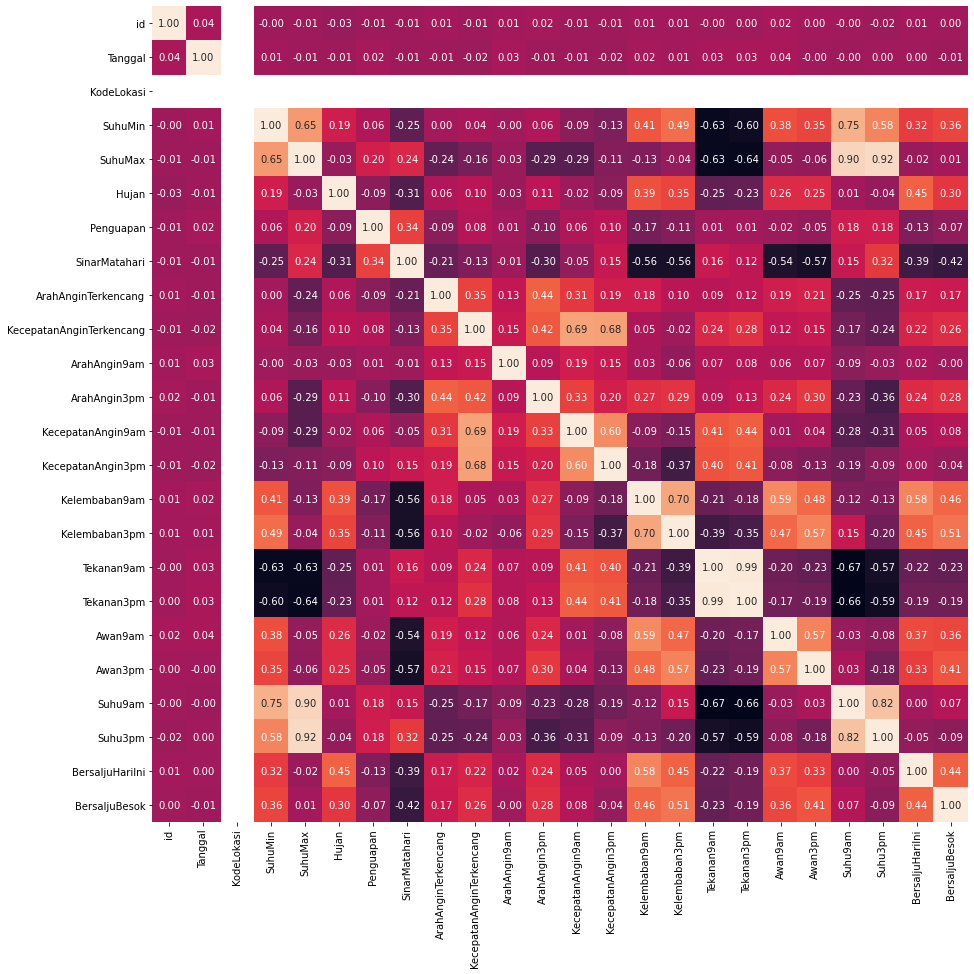

In [15]:
plt.figure(figsize=(15,15)) #mengatur ukuran heatmap

#melihat korelasi data
sns.heatmap(df.corr(), square=True, annot=True, fmt=".2f", cbar=False)

In [16]:
#memilih data kelembaban3pm dan kelembaban9pm karena berkorelasi tinggi dengan besoksalju
df_selected = df[["Kelembaban9am", "Kelembaban3pm"]]

#cek data teratas
df_selected

,Kelembaban9am,Kelembaban3pm
Tanggal,,
2008-01-12,62.0,66.0
2008-02-12,75.0,62.0
2008-03-12,69.0,42.0
2008-04-12,60.0,31.0
2008-05-12,64.0,56.0
...,...,...
2017-11-06,67.0,67.0
2017-12-01,85.0,72.0
2017-12-04,75.0,62.0


<AxesSubplot:xlabel='Kelembaban9am', ylabel='Kelembaban3pm'>

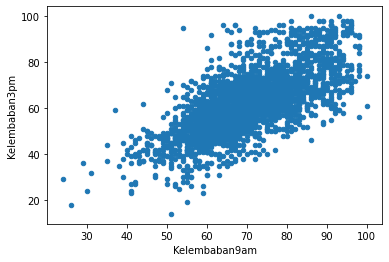

In [17]:
#tampilkan scatter data
df_selected.plot(x="Kelembaban9am", y="Kelembaban3pm" ,kind="scatter")

# Data Exploration

## membersihkan data outlier

<AxesSubplot:>

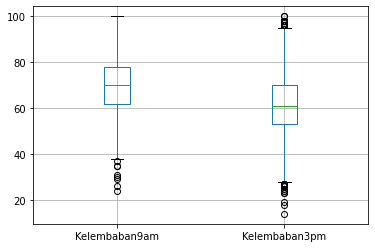

In [18]:
#cek data outlier
df_selected.boxplot()

/home/galuhramaditya/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/galuhramaditya/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/galuhramaditya/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<AxesSubplot:xlabel='Kelembaban9am', ylabel='Kelembaban3pm'>

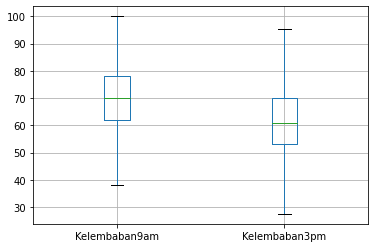

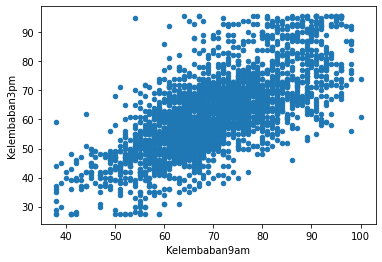

In [19]:
#membersihkan data outlier
for kolom, data in df_selected.iteritems(): #loop tiap kolom
    Q1 = data.quantile(0.25) #mengambil quartil 1 data
    Q3 = data.quantile(0.75) #mengambil quartil 3 data
    IQR = Q3 - Q1 #mencari interquartile range data
    
    data[data < Q1 - 1.5*IQR] = Q1 - 1.5*IQR #mengganti data outlier di bawah batas bawah menjadi batas bawah
    data[data > Q3 + 1.5*IQR] = Q3 + 1.5*IQR #mengganti data outlier di atas batas atas menjadi batas atas

#cek data outlier kembali
df_selected.boxplot()

#tampilkan scatter data
df_selected.plot(x="Kelembaban9am", y="Kelembaban3pm" ,kind="scatter")

## menormalisasi data

<AxesSubplot:ylabel='Frequency'>

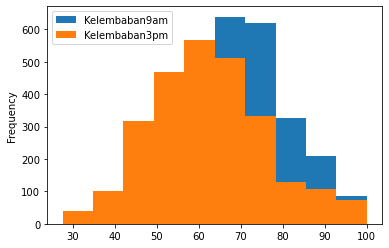

In [20]:
#cek normalisasi data
df_selected.plot(kind="hist")

<AxesSubplot:xlabel='Kelembaban9am', ylabel='Kelembaban3pm'>

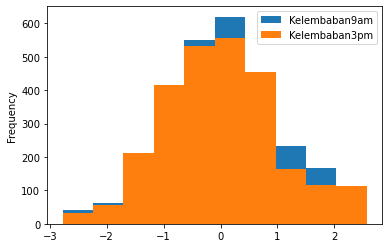

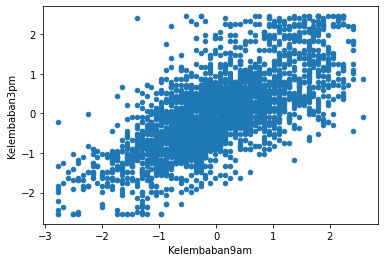

In [21]:
#normalisasi data
df_selected = df_selected.transform(lambda x: (x-x.mean()) / x.std())

#cek normalisasi data kembali
df_selected.plot(kind="hist")

#tampilkan scatter data
df_selected.plot(x="Kelembaban9am", y="Kelembaban3pm" ,kind="scatter")

In [22]:
#tampilkan data
df_selected

,Kelembaban9am,Kelembaban3pm
Tanggal,,
2008-01-12,-0.706043,0.287650
2008-02-12,0.415753,-0.006115
2008-03-12,-0.101999,-1.474943
2008-04-12,-0.878627,-2.282799
2008-05-12,-0.533459,-0.446764
...,...,...
2017-11-06,-0.274583,0.361091
2017-12-01,1.278673,0.728298
2017-12-04,0.415753,-0.006115


# Modeling

In [23]:
#buat class KMeans
class KMeans:
    #buat constructor
    def __init__(self, df):
        self.df = df #masukan df menjadi properti class
    
    #buat method fit
    def fit(self, k, iterasi=10, desc=None):
        #buat df menjadi array
        df_arr = self.df.to_numpy()
        
        #generate centroid awal
        self.centroid = np.random.choice(len(df_arr), k) #pilih k index random
        self.centroid = df_arr[self.centroid] #ambil df_arr berdasarkan index random
        
        #proses mencari cluster
        for _ in tqdm(range(iterasi), desc=desc): #looping sebanyak iterasi
            #buat cluster kosong sebanyak jumlah centroid
            self.cluster = [[] for _ in self.centroid]
            
            #loop tiap data
            for data in df_arr:
                #mencari index cluster yang jarak dengan datanya terkecil
                jarak = [((data-centroid)**2).sum()**(1/2) for centroid in self.centroid] #metode euclidean
                jarak = np.argmin(jarak) #mengambil index jarak terkecil
                
                #menambah array data ke dalam cluster dengan index dari jarak terkecil
                self.cluster[jarak].append(data)
            
            #update nilai centroid dengan rata rata tiap clusternya
            self.centroid = [np.mean(cluster, axis=0) for cluster in self.cluster]
    
    #buat method plot
    def plot(self, ax, title=None, legend=False):
        #set title dengan parameter title
        try:
            ax.set_title(title)
        except: #jika error
            ax.title(title)

        #plot data cluster
        for i, cluster in enumerate(self.cluster): #loop data cluster
            cluster = np.array(cluster) #buat cluster menjadi array
            ax.scatter(cluster[:,0], cluster[:,1], label=f"cluster {i+1}") #plot cluster

        #plot data centroid
        centroid = np.array(self.centroid) #buat centroid menjadi array
        ax.scatter(centroid[:,0], centroid[:,1], s=100, c="white", edgecolors="black", label=f"centroid") #plot centroid
        
        #jika legend bernilai True
        if legend:
            ax.legend() #tampilkan legenda

  0%|          | 0/10 [00:00<?, ?it/s]

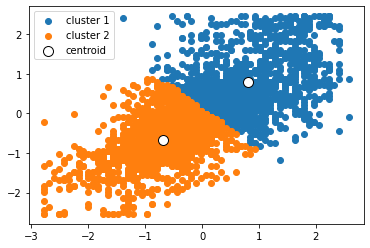

In [24]:
#test model KMeans
model = KMeans(df_selected) #buat objek model
model.fit(k=2) #fit model
model.plot(plt, legend=True) #plot model

# Experiment

k=1:   0%|          | 0/10 [00:00<?, ?it/s]

k=2:   0%|          | 0/10 [00:00<?, ?it/s]

k=3:   0%|          | 0/10 [00:00<?, ?it/s]

k=4:   0%|          | 0/10 [00:00<?, ?it/s]

k=5:   0%|          | 0/10 [00:00<?, ?it/s]

k=6:   0%|          | 0/10 [00:00<?, ?it/s]

k=7:   0%|          | 0/10 [00:00<?, ?it/s]

k=8:   0%|          | 0/10 [00:00<?, ?it/s]

k=9:   0%|          | 0/10 [00:00<?, ?it/s]

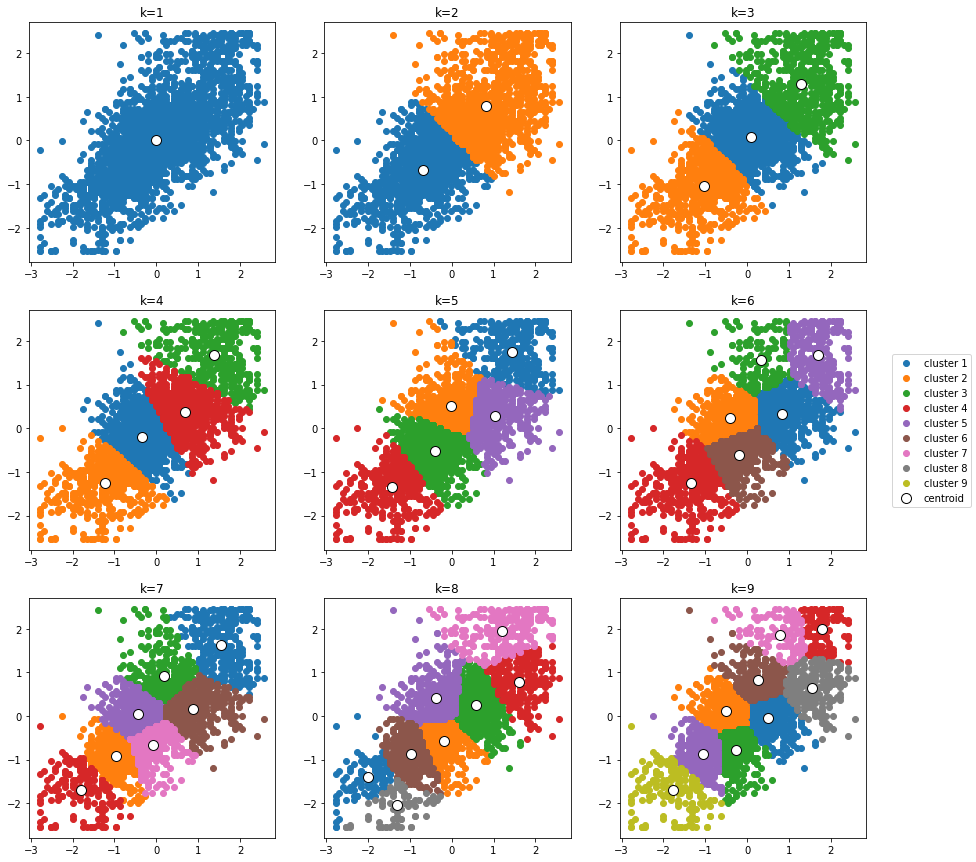

In [25]:
#experiment k dengan rentang 1-9
rentang = (1, 9)

#inisialisasi baris dan kolom plot
kolom = 3 #jumlah kolom
baris = (rentang[1]-rentang[0]+kolom)//kolom #jumlah baris

#mengatur ukuran plot
fig = plt.figure(figsize=(15,15))

#mengatur lokasi plot
axes = fig.subplots(baris, kolom) #subplot
axes = axes.ravel() #ubah menjadi 1 dimensi

#looping sesuai rentang
for k in range(rentang[0], rentang[1]+1):
    model = KMeans(df_selected) #buat objek model
    model.fit(k=k, desc=f"k={k}") #fit model
    model.plot(axes[k-rentang[0]], title=f"k={k}") #plot model

#legend
lines, labels = axes[-1].get_legend_handles_labels() #dapatkan legend dari axes terakhir
fig.legend(lines, labels, loc="center right") #tampilkan legend

# Evaluasi

In [26]:
#buat class Elbow
class Elbow:
    #buat constructor
    def __init__(self, df):
        self.df = df #masukan df menjadi properti class
    
    #buat method fit
    def fit(self, rentang, iterasi=10):
        #buat rentang menjadi list range
        self.rentang = range(rentang[0], rentang[1]+1)

        #buat inertia sebanyak rentang
        self.inertia = [0 for _ in self.rentang]

        #looping sesuai rentang
        for i, k in enumerate(self.rentang):
            model = KMeans(df) #buat objek model
            model.fit(k=k, iterasi=iterasi, desc=f"k={k}") #fit model

            #loop data centroid dan cluster
            for centroid, cluster in zip(model.centroid, model.cluster):
                #menghitung jarak centroid dengan clusternya
                jarak = ((cluster-centroid)**2).sum()**(1/2) #metode euclidean
                jarak = jarak**2 #rumus inertia

                #tambah inertia dengan jarak
                self.inertia[i] += jarak

    #buat method plot
    def plot(self):
        plt.plot(self.rentang, self.inertia)

k=1:   0%|          | 0/10 [00:00<?, ?it/s]

k=2:   0%|          | 0/10 [00:00<?, ?it/s]

k=3:   0%|          | 0/10 [00:00<?, ?it/s]

k=4:   0%|          | 0/10 [00:00<?, ?it/s]

k=5:   0%|          | 0/10 [00:00<?, ?it/s]

k=6:   0%|          | 0/10 [00:00<?, ?it/s]

k=7:   0%|          | 0/10 [00:00<?, ?it/s]

k=8:   0%|          | 0/10 [00:00<?, ?it/s]

k=9:   0%|          | 0/10 [00:00<?, ?it/s]

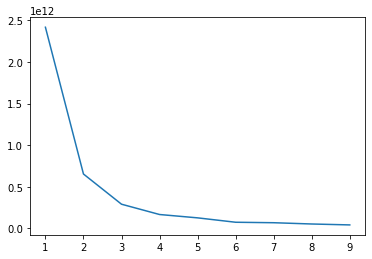

In [27]:
validasi = Elbow(df_selected) #membuat ojek validasi
validasi.fit((1, 9)) #fit validasi dengan rentang k 1-9
validasi.plot() #menampilkan plot